In [1]:
import sys
from glob import glob

In [2]:
files = glob('../data_intensity/csv/*.csv.gz')

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")

In [22]:
def filtering(df):
    #First removing columns
    filt_df = df[["area","solidity","eccentricity","mean_intensity"]]
    #Then, computing percentiles
    low = .01
    high = .99
    quant_df = filt_df.quantile([low, high])
    #Next filtering values based on computed percentiles
    filt_df = filt_df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                        (x < quant_df.loc[high,x.name])], axis=0)
    #Bringing the columns back
    #filt_df = pd.concat([df.loc[:,'User_id'], filt_df], axis=1)

    #rows with NaN values can be dropped simply like this
    filt_df.dropna(inplace=True)
    return filt_df

../data_intensity/csv/id_45.fov_centroids_embedding_morphology.covd.pkl.size267722.intensity.csv.gz


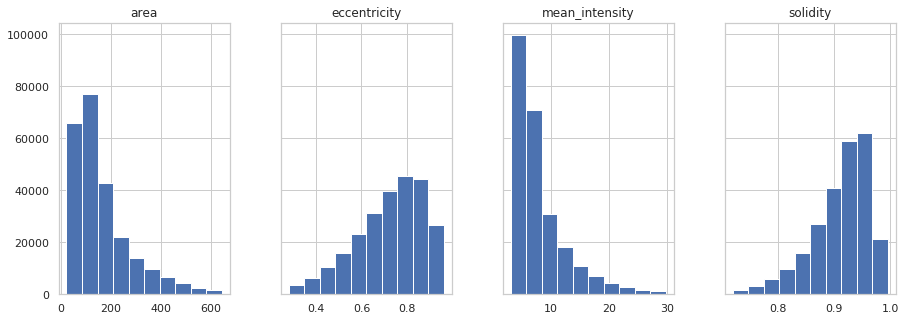

../data_intensity/csv/id_56.fov_centroids_embedding_morphology.covd.pkl.size1008658.intensity.csv.gz


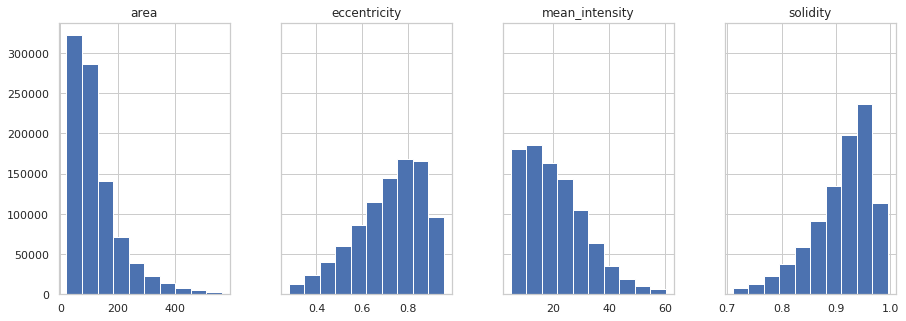

../data_intensity/csv/id_46.fov_centroids_embedding_morphology.covd.pkl.size433601.intensity.csv.gz


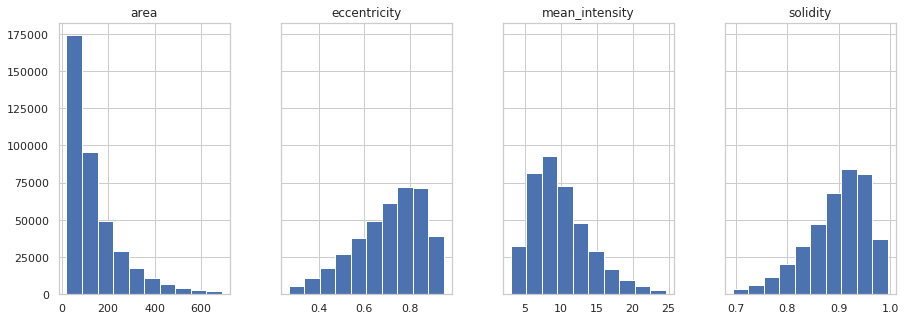

../data_intensity/csv/id_38.fov_centroids_embedding_morphology.covd.pkl.size13833.intensity.csv.gz


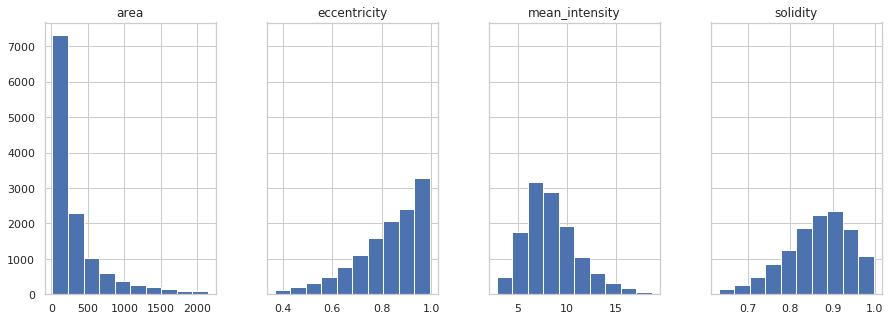

../data_intensity/csv/id_54.fov_centroids_embedding_morphology.covd.pkl.size738141.intensity.csv.gz


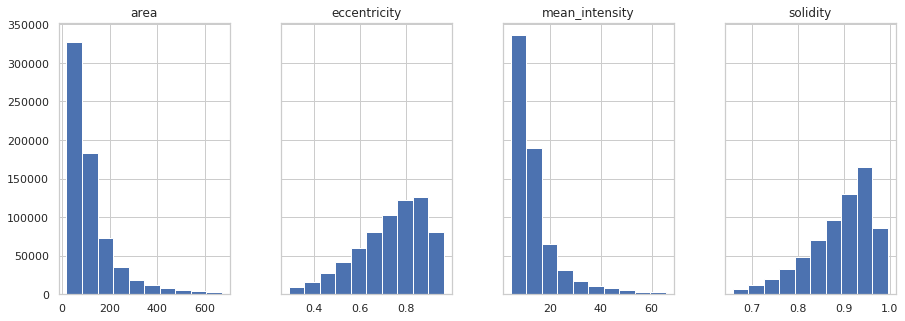

../data_intensity/csv/id_41.fov_centroids_embedding_morphology.covd.pkl.size495175.intensity.csv.gz


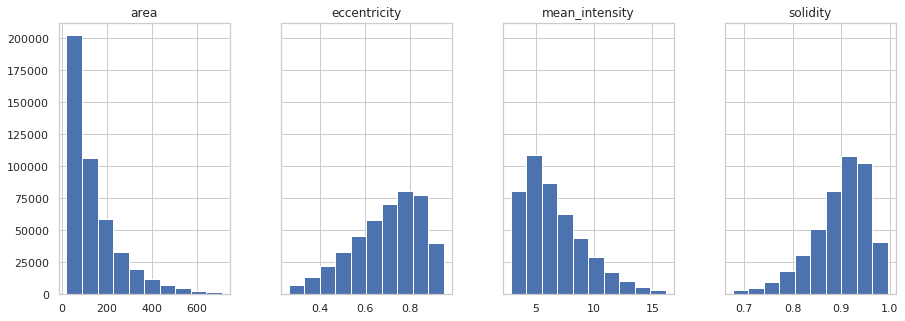

../data_intensity/csv/id_51.fov_centroids_embedding_morphology.covd.pkl.size1338623.intensity.csv.gz


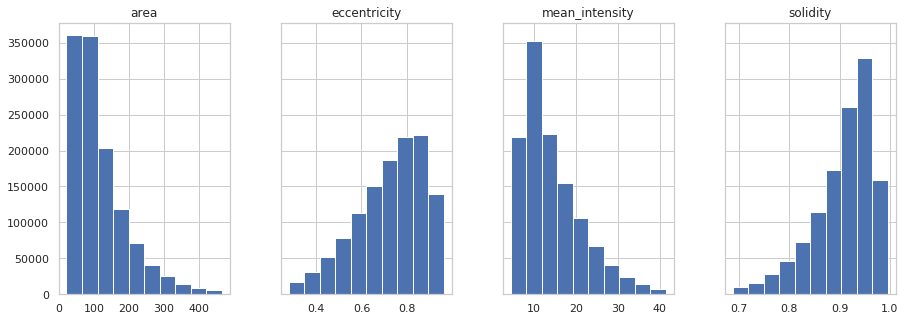

../data_intensity/csv/id_52.fov_centroids_embedding_morphology.covd.pkl.size900356.intensity.csv.gz


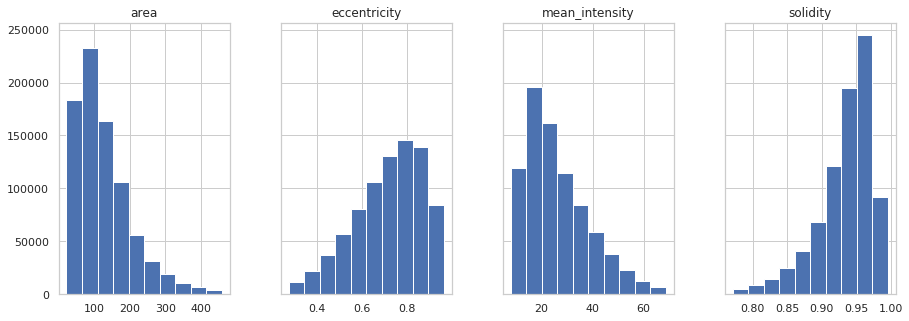

../data_intensity/csv/id_57.fov_centroids_embedding_morphology.covd.pkl.size1119821.intensity.csv.gz


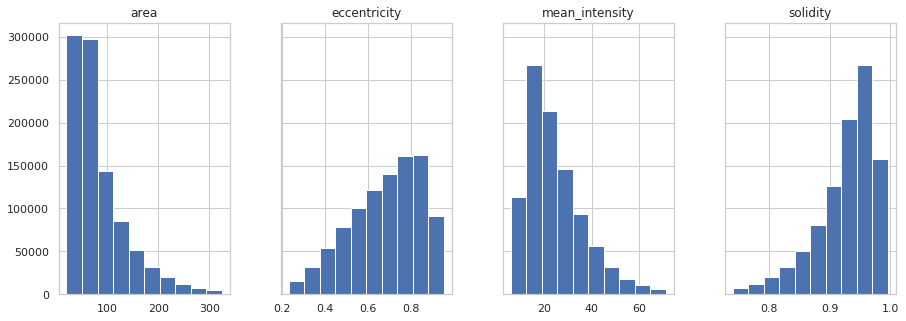

../data_intensity/csv/id_13.fov_centroids_embedding_morphology.covd.pkl.size504854.intensity.csv.gz


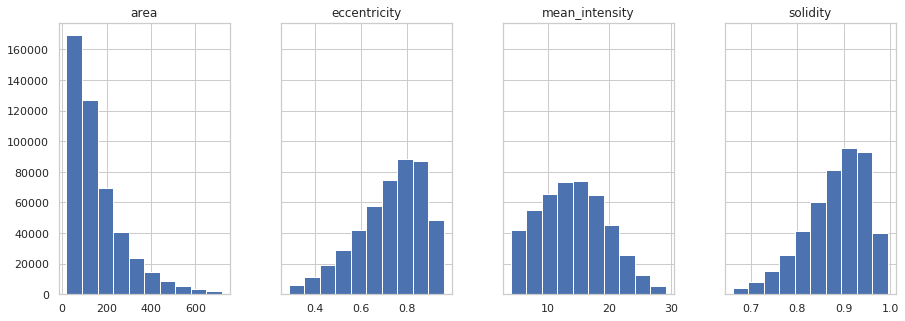

../data_intensity/csv/id_39.fov_centroids_embedding_morphology.covd.pkl.size536222.intensity.csv.gz


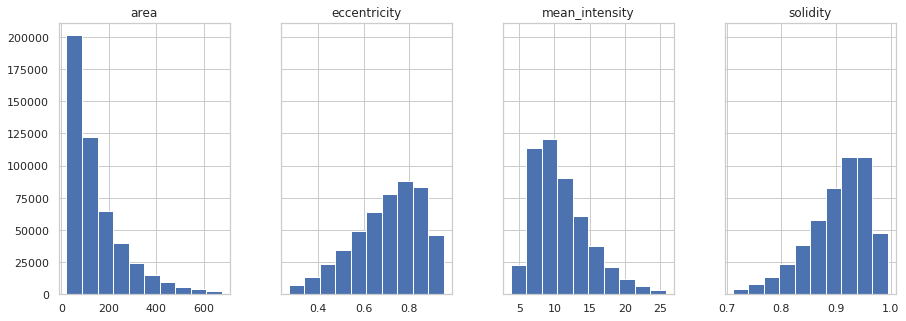

../data_intensity/csv/id_40.fov_centroids_embedding_morphology.covd.pkl.size527652.intensity.csv.gz


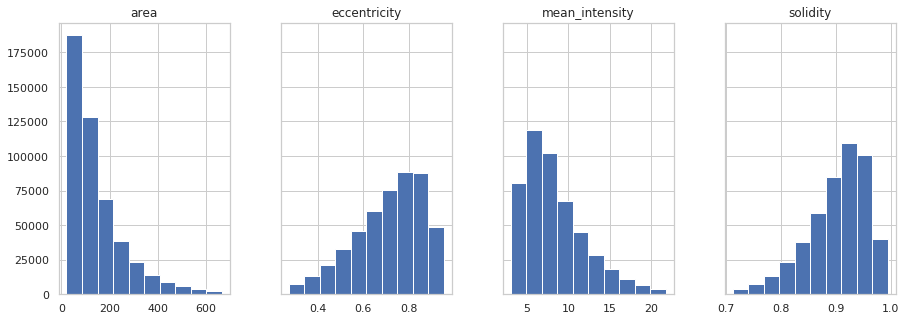

../data_intensity/csv/id_17.fov_centroids_embedding_morphology.covd.pkl.size1063656.intensity.csv.gz


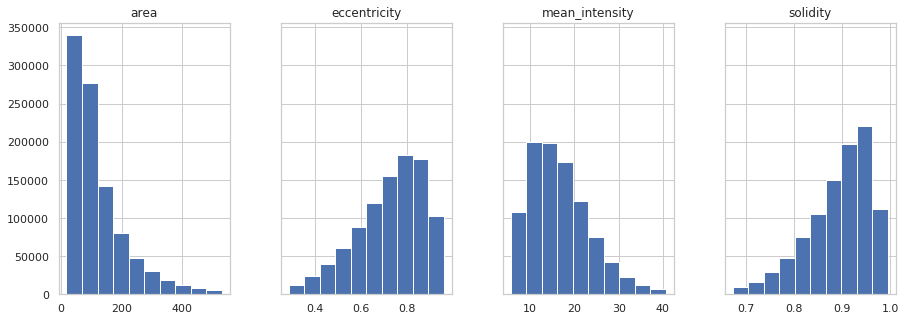

In [32]:
for f in files[:]:
    print(f)
    outfile = f+'.summary_stat.absolute.png'
    df = pd.read_csv(f)
    fdf = filtering(df)
    fdf.hist(layout=(1,4),figsize=(15,5),sharey=True)
    plt.show()